<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.07/bds_series_temporales_002_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>


# **<font color="DeepPink"> Predicción con series temporales </font>**


La predicción de series temporales busca prever los valores futuros de una serie temporal en función de sus observaciones pasadas. Los objetivos pueden variar según el contexto, como anticipar la demanda de un producto, pronosticar el rendimiento financiero de una empresa o estimar la propagación de una enfermedad. Al lograr predicciones precisas, podemos tomar decisiones informadas y planificar estrategias adecuadas.

## **<font color="DeepPink"> Instalación y preparación de datos </font>**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


## **<font color="DeepPink"> El problema de predicción</font>**

El objetivo de la predicción es obtener valores $y_{T+1}$ basadas en las observaciones que tenemos de $\{y_1, \dots, y_T\}$ obtenidas normalmente de espacios equidistantes en el tiempo. Para realizar dicha predicción se puede disponer además de un conjunto de predictores, $x_{i,t}, i = 1,\dots , k, t = 1, \dots , T$. Estos predictores pueden ser todo tipo de variables que puedan ayudar a mejorar la predicción.

Los datos que pueden ser "largos" cuando tenemos muchas observaciones con respecto a los predictores (esto es lo forma habitual para los modelos convencionales) o podemos tener datos "anchos en donde $k$ supera a la cantidad de observaciones $T$. Este tipo de datos es más frecuente en el campo del machine learning. También se pueden clasificar en datos "densos" cuando la frecuencia de observación es muy elevada.

El problema de predicción es obtener predicciones del próximo periodo mediante el siguiente procedimiento:

$$\hat{y}_{T+1|T}= \mathcal{f}\left(y_T,\dots ,y_1, x_{1,1},\dots , x_{1,T},\dots ,x_{k,T}\right),$$

dónde $\mathcal{f}$ es una función desconocida de los datos disponibles en el periodo $T$.


Generemos un proceso autoregresivo AR(1) que tenga la siguiente forma:

$$ y_t = \mu + \phi y_{t-1} + A_t $$<br>


Entonces bajo las estrategias comunmente utilizadas en series de tiempo podemos analizar la misma con los gráficos de autocorrelación y parcial autocorrelación y determinamos la forma de la serie. Esta determinación de la serie, no es otra cosa que definir la función $\mathcal{f}$.

<Axes: >

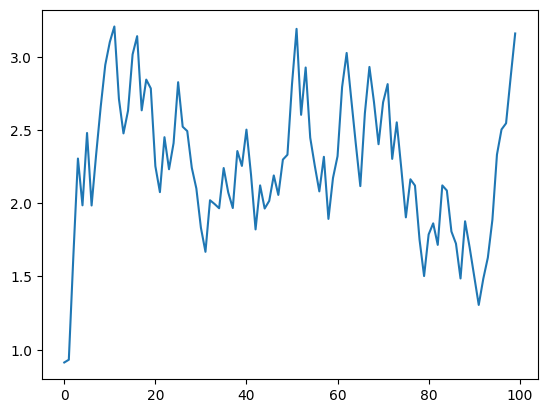

In [ ]:
np.random.seed(5464)

y = []
v = 0
for i in range(100):
  v = v*0.8+ np.random.rand()
  y.append(v)
y = pd.Series(y)

y.plot()

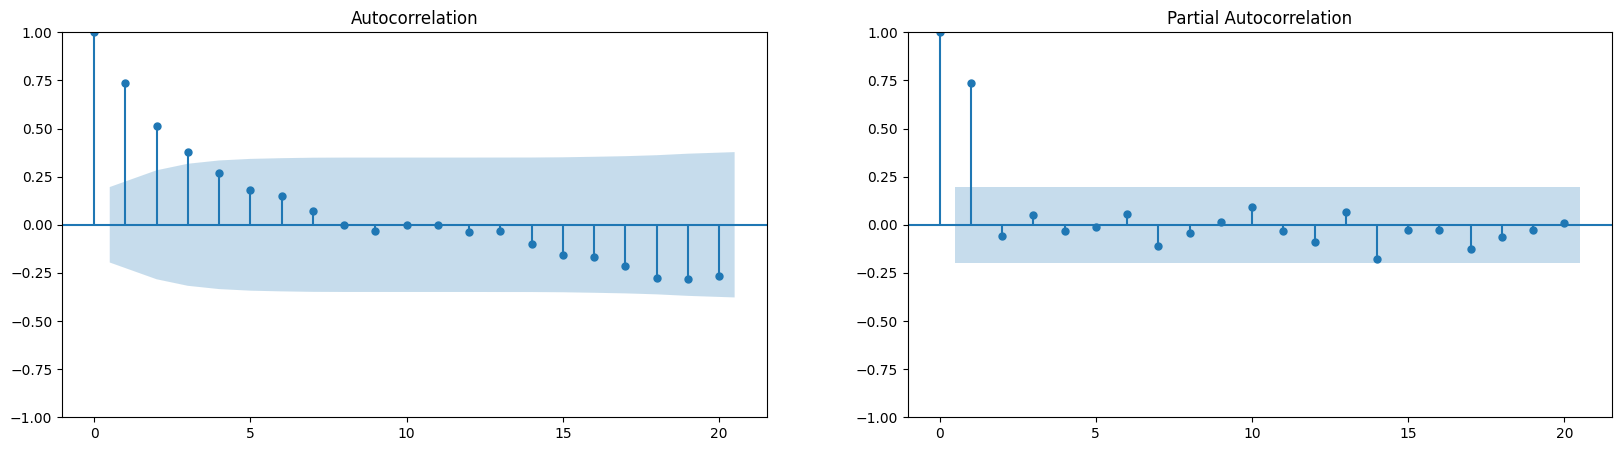

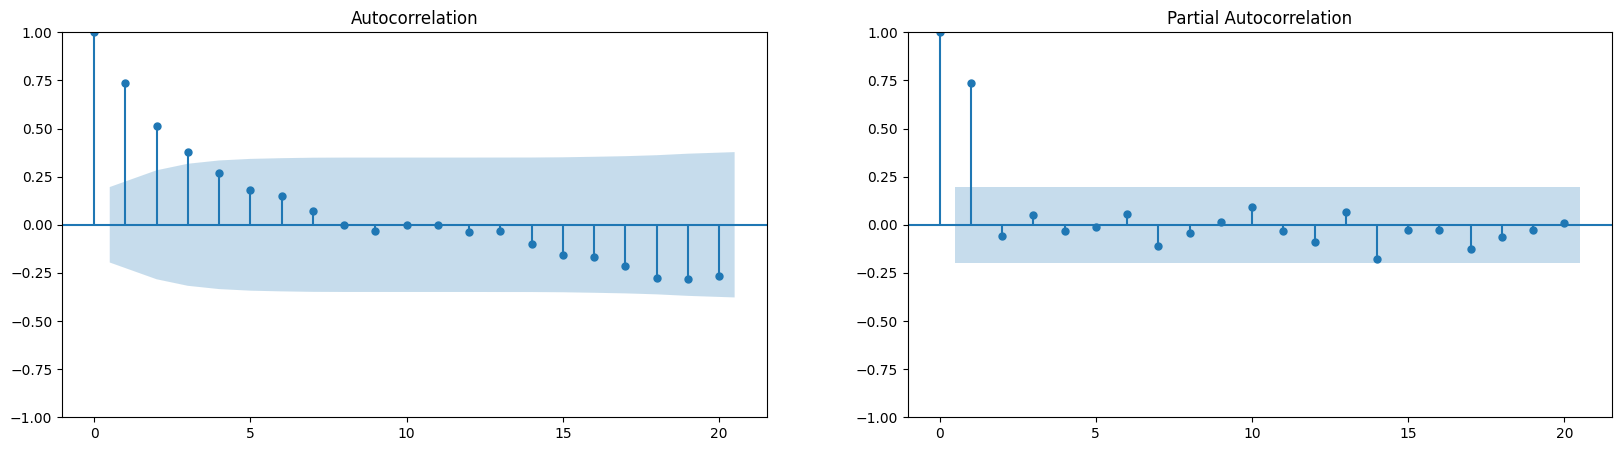

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize= (20,5))

plot_acf(y, lags=20, ax = ax[0])
plot_pacf(y, lags=20, ax = ax[1])

Luego de que detectamos la función que nosotros pensamos que es la correcta, procedemeos a realizar la estimación y luego la predicción

In [ ]:
from sklearn.linear_model import LinearRegression

ar = LinearRegression()
X_ar = (y.shift(1).dropna()).values.reshape(-1,1)
X_ar = X_ar[11:]
y_ar = y[12:].values

ar.fit(X_ar,y_ar)



LinearRegression()

Podemos ver el coeficiente que nos arroja

In [ ]:
ar.coef_

array([0.77067967])

y podemos ver la predicción de manera gráfica

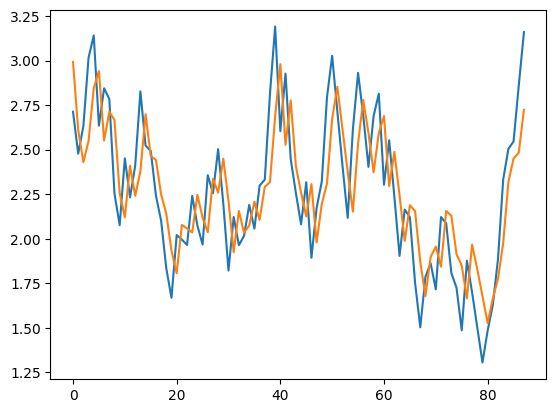

In [ ]:
plt.plot(y_ar, label = 'real')
plt.plot(ar.predict(X_ar), label = 'predicción')

Y podemos evaluar el modelo en cuestión con alguna métrica como por ejemplo el error cuadrático medio

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_ar,ar.predict(X_ar) )

0.07339418602612816

**¿Qué podemos hacer desde el machine learning?**

Bueno, este proceso anterior es el clásico que se ha usado en series de tiempo pero las nuevas metodologías y la gran cantidad de datos permiten realizar predicciones de otra forma.

En el caso anterior analizando la serie llegamos a construir la función $\mathcal{f}$ pero ahora nos vamos a enfocar solo en mejorar la predicción. Esto se basa en que los problemas de predicción son diferentes de los problemas de estimación.

En estimación buscamos:

$$\mathrm{E}\left(\hat{\mathcal{f}}\right)=\mathcal{f}$$

En cambio en predicción estamos concentrados en disminuir la función de pérdida:

$$\mathrm{min}\space \mathrm{L}\left(\mathcal{f}\right) = \mathrm{E}\space\mathcal{l}\left(\mathcal{f}(X),y\right)$$

Por lo tanto la metodología usada cambia. En el ejemplo presentado vamos a agregar rezagos, sin analizar la serie, simplemente agregamos y calculamos.





In [ ]:
# generamos una función creadora de rezagos
def gen_lags(var, ini = 1, fin = 13, tend = True):
  X = []
  nombres = []
  for i in range(ini,fin):
    v = var.shift(i)
    X.append(v)
    nombres.append('lag'+str(i))

  X = pd.concat(X, axis = 1)
  X.columns = nombres
  if tend:
    X['tend'] = range(len(X))
  return X

X = gen_lags(y)

X

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,tend
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.912763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0.931541,0.912763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,1.641876,0.931541,0.912763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,2.305438,1.641876,0.931541,0.912763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.887590,1.629012,1.484487,1.305866,1.502494,1.699032,1.876985,1.486478,1.724462,1.807328,2.086965,2.121947,95
96,2.332356,1.887590,1.629012,1.484487,1.305866,1.502494,1.699032,1.876985,1.486478,1.724462,1.807328,2.086965,96
97,2.503920,2.332356,1.887590,1.629012,1.484487,1.305866,1.502494,1.699032,1.876985,1.486478,1.724462,1.807328,97
98,2.546194,2.503920,2.332356,1.887590,1.629012,1.484487,1.305866,1.502494,1.699032,1.876985,1.486478,1.724462,98


In [ ]:
mod_lin = LinearRegression()

X = X.dropna()
y2 = y[X.index[0]:X.index[-1]+1].values

mod_lin.fit(X,y2)

LinearRegression()

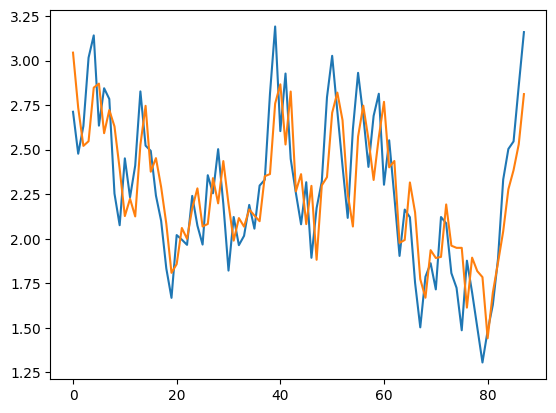

In [ ]:
plt.plot(y2, label = 'real')
plt.plot(mod_lin.predict(X), label = 'predicción')


Obtenemos los coeficientes y vemos que el método le da coeficientes a todas las variables

In [ ]:
mod_lin.coef_

array([ 7.95504988e-01, -7.23086432e-02,  1.41589877e-01, -1.72363291e-01,
        4.37020597e-02,  2.84646137e-02,  4.51051034e-02, -1.28556714e-01,
       -5.03981305e-02,  1.82876653e-01,  6.57268941e-02, -1.57595010e-01,
       -2.80754156e-04])

Luego calculamos el error cuadrático medio y nos encontramos que aunque no sea la verdadera función tiene un mejor resultado de predicción que con el método anterior.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y2,mod_lin.predict(X) )

0.06719237138118878

En realidad en el ejemplo anterior definimos una función que consistía en tomar 12 rezagos y una tendencia, pero en definitiva el modelo lo elegimos nosotros solo que lo hicimos más complejo. Pero, gracias a la potencia computacional y los datos a esto lo podemos correr varias veces y seleccionar el que mejor ajuste.

In [ ]:
mse = []

for i in range(1,13):
  xx = X.iloc[:,0:i].values
  xx = np.c_[xx,X.tend.values]
  mod_lin.fit(xx,y2)
  mse.append(mean_squared_error(y2,mod_lin.predict(xx)))

In [ ]:
mse

[0.07338114089653512,
 0.07330149143744173,
 0.07287047170849079,
 0.07179881154075612,
 0.07176155526920243,
 0.07175999118025422,
 0.07173949313076806,
 0.07119368340992925,
 0.07111868523873764,
 0.06958162235750044,
 0.06928571057289107,
 0.06719237138118878]

Ahora tenemos todos los errores y podemos elegir el que menos tiene. Cómo se puede ver el que mejor ajusta es el que tiene los 12 rezagos, y esto no es casualidad.

## **<font color="DeepPink">Evaluar fuera de la muestra  </font>**

Los métodos clásicos de estimación de los modelos de series temporales se basan en estudios estadísticos sustentados y es de ahí que adoptan toda su validez para ser usados. Por el contrario, de la última forma elegimos variables explicativas y seleccionamos un modelo sin ningún sustento teórico, solo basándonos en los datos. Pero bajo esta opción siempre vamos a seleccionar el modelo más complejo (más variables) por el problema del sobre ajuste (overfiting). Es por eso, que lo que termina de validar las técnicas de ML es que evaluamos nuesras predicciones pero en datos fuera de la muestra.



In [ ]:
porcentaje = 0.8
indice = int(len(X)*porcentaje)

X_train, X_test = X.iloc[:indice],X.iloc[indice:]
y2_train, y2_test = y2[:indice], y2[indice:]

mse = []

for i in range(1,13):
  xx = X_train.iloc[:,0:i].values
  xx_test = X_test.iloc[:,0:i].values
  xx = np.c_[xx,X_train.tend.values]
  xx_test = np.c_[xx_test,X_test.tend.values]
  mod_lin.fit(xx,y2_train)
  mse_train = mean_squared_error(y2_train,mod_lin.predict(xx))
  mse_test = mean_squared_error(y2_test,mod_lin.predict(xx_test))

  mse.append(np.array([mse_train,mse_test]))

mse = np.array(mse)

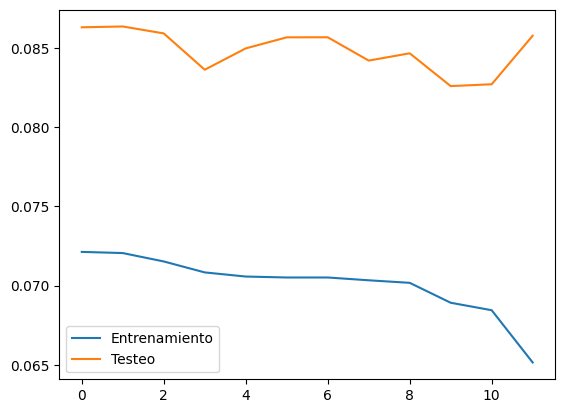

In [ ]:
plt.plot(mse[:,0], label = 'Entrenamiento')
plt.plot(mse[:,1], label = 'Testeo')
plt.legend()

In [ ]:
mse

array([[0.07213276, 0.08632006],
       [0.07205839, 0.08637225],
       [0.07152834, 0.08593416],
       [0.07083613, 0.08364097],
       [0.07057524, 0.08498768],
       [0.0705153 , 0.08568569],
       [0.07051529, 0.0856908 ],
       [0.07033872, 0.08421784],
       [0.07017754, 0.08467813],
       [0.06891983, 0.08260567],
       [0.06844753, 0.08272245],
       [0.06514665, 0.08578979]])

Los resultados ahora cambian y ya no es la mejor opción usar 12 rezagos para hacer las predicciones.

# **<font color="DeepPink">Predicción en un caso real </font>**



In [ ]:
url = "https://raw.githubusercontent.com/pabanib/dataframes/master/salarios/salarios.csv"
salarios = pd.read_csv(url)
salarios['prom'] = salarios.masa/salarios.puestos
salarios['fecha'] = pd.to_datetime(salarios.fecha)
salarios = salarios.set_index(['id_provincia_indec','fecha'])
salarios = salarios.drop('masa', axis = 1)
salarios.head()

puestos          prom
id_provincia_indec fecha                              
2.0                2014-01-01  1146412.0  13602.508152
                   2014-02-01  1147371.0  13112.141634
                   2014-03-01  1149616.0  14332.032933
                   2014-04-01  1148638.0  14471.111439
                   2014-05-01  1150599.0  14049.396872

In [ ]:
valores = pd.read_csv("https://raw.githubusercontent.com/pabanib/dataframes/master/salarios/cer-uva-uvi-diarios.csv")

valores = valores.set_index(pd.to_datetime(valores['indice_tiempo']))

cer = valores.cer_diario

Al promedio de salarios tenemos que aplicarle le vamos a aplicar las transformaciones de eliminarle el ciclo (que se debe al sac) y ponerlo a valores constantes para que no sea una serie no estacionaria.


In [ ]:
# generamos el filtro sac
x = salarios
indice = x.index.get_level_values(1)
f = np.ones(len(x))+0.5 *((indice.month == 6)+(indice.month == 12))
#aplicamos el filtro sac a la variable promedio
prom =  x.prom/f

#generamos la variable inflación en el rango de periodos
inf = cer.loc['2014-01':'2022-11'].resample('m').last()
#Dividimos por el primer valor así nos queda a valores de 2014
inf = inf/inf[0]

#como tenemos 24 provincias con 107 periodos, tenemos que sacarle la inflación a cada una
#una forma rápida de hacerlo es con el producto kroneker
inf_ = np.kron(np.ones(24), inf)

#dividimos el promedio por esta variable
prom = prom/inf_

In [ ]:
prov = 50

#creamos la variable y qeu va ser nuestro objetivo
y = prom.loc[prov]

#generamos los lags con la función que ya habíamos creado y tendencia
y_lags = gen_lags(y)

y_lags




,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,tend
fecha,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2014-02-01,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2014-03-01,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2014-04-01,8192.845116,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2014-05-01,8619.997175,8192.845116,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,8482.707542,8304.433728,8172.488086,8215.628119,102
2022-08-01,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,8482.707542,8304.433728,8172.488086,103
2022-09-01,8735.563104,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,8482.707542,8304.433728,104


In [ ]:
#hacemos lo mismo para los puestos de trabajo
puestos = gen_lags(salarios.loc[prov].puestos, tend = False)
puestos

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
fecha,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-01,417718.0,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01,423322.0,417718.0,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-01,430541.0,423322.0,417718.0,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0,410072.0,407783.0
2022-08-01,423768.0,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0,410072.0
2022-09-01,422842.0,423768.0,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0


In [ ]:
#juntamos los df para tener todo en uno solo

X = pd.merge(y_lags, puestos,left_index = True, right_index = True, suffixes = ('_prom','_puestos') )
X

,lag1_prom,lag2_prom,lag3_prom,lag4_prom,lag5_prom,lag6_prom,lag7_prom,lag8_prom,lag9_prom,lag10_prom,...,lag3_puestos,lag4_puestos,lag5_puestos,lag6_puestos,lag7_puestos,lag8_puestos,lag9_puestos,lag10_puestos,lag11_puestos,lag12_puestos
fecha,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-01,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-01,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-01,8192.845116,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-01,8619.997175,8192.845116,8167.130894,8690.750087,NaN,NaN,NaN,NaN,NaN,NaN,...,417718.0,407694.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,8482.707542,8304.433728,...,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0,410072.0,407783.0
2022-08-01,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,8482.707542,...,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0,410072.0
2022-09-01,8735.563104,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,8491.834677,...,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,418990.0,410876.0,410468.0


In [ ]:
#eliminamos los valores nulos y cortamos la y de acuerdo a ello

X = X.dropna()
y = y.loc[X.index[0]:]
y

fecha
2015-01-01     9339.164749
2015-02-01     9075.343204
2015-03-01     9359.976038
2015-04-01     9558.087961
2015-05-01    10137.496902
                  ...     
2022-07-01     8627.705083
2022-08-01     8735.563104
2022-09-01     8651.631735
2022-10-01     8586.586615
2022-11-01     8635.119903
Name: prom, Length: 95, dtype: float64

Todos estos pasos que realizamos los podemos convertir en una función para que nos quede de manera más prolija y lo podamos vovler a repetir otras veces.

In [ ]:
def datos_prov(prov ,ini = 1, fin = 13, tend = True):
  y = prom.loc[prov]
  y_lags = gen_lags(y, ini = ini, fin = fin, tend = tend)
  puestos = gen_lags(salarios.loc[prov].puestos,ini = ini, fin = fin, tend = False)
  X = X = pd.merge(y_lags, puestos,left_index = True, right_index = True, suffixes = ('_prom','_puestos') )
  X = X.dropna()
  y = y.loc[X.index[0]:]
  return X,y

X,y = datos_prov(50)
y

fecha
2015-01-01     9339.164749
2015-02-01     9075.343204
2015-03-01     9359.976038
2015-04-01     9558.087961
2015-05-01    10137.496902
                  ...     
2022-07-01     8627.705083
2022-08-01     8735.563104
2022-09-01     8651.631735
2022-10-01     8586.586615
2022-11-01     8635.119903
Name: prom, Length: 95, dtype: float64

In [ ]:
y.shape, X.shape

((95,), (95, 25))

Ahora con los datos armados hay que realizar la predicción que va constar de un modelo lineal por ahora. La diferencia qua ahora nuestra función no solo depende de los valores de la variable anterior, si no que también de los puestos de trabajo. O sea hemos agregado una variable externa y explicativa al modelo.

Vamos a construir un pippeline para hacer las últimas transformaciones que mejoren el modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline

Ya sabemos que las series temporales tienen un mejor comportamiento en logaritmos, por lo que disminuye la varianza y convierte en lienal lo exponencial. Por lo tanto, vamos agregar a la transformación el logaritmo.

Con la función <code>FunctionTransformer</code> de <code>sklearn</code> podemos agregar funciones que no estan establecidas en los transformadores habituales.

In [ ]:
logaritmo = FunctionTransformer(np.log, validate = True, inverse_func = np.exp)
logaritmo.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


array([[ 9.03441377,  9.09437494,  9.09779556, ..., 12.9558884 ,
        12.94256184, 12.91827217],
       [ 9.1419721 ,  9.03441377,  9.09437494, ..., 12.97279784,
        12.9558884 , 12.94256184],
       [ 9.11331648,  9.1419721 ,  9.03441377, ..., 12.92809879,
        12.97279784, 12.9558884 ],
       ...,
       [ 9.07515769,  9.06273383,  8.98810038, ..., 12.94560233,
        12.92604674, 12.92505325],
       [ 9.06550322,  9.07515769,  9.06273383, ..., 12.95073959,
        12.94560233, 12.92604674],
       [ 9.05795657,  9.06550322,  9.07515769, ..., 12.94814093,
        12.95073959, 12.94560233]])

Vamos armar un <code> pipeline </code> que trabaje con las variables primero calculando el logaritmo y luego aplicando una standarización

In [ ]:
proceso_num = make_pipeline(logaritmo, StandardScaler())
proceso_num.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


array([[-1.21907014, -0.50910631, -0.4734671 , ...,  0.14855399,
        -0.41437931, -1.41497364],
       [ 0.0657036 , -1.22771853, -0.5145732 , ...,  0.86638675,
         0.15093515, -0.39560973],
       [-0.276585  ,  0.06132778, -1.23513617, ..., -1.03115956,
         0.86823607,  0.16366543],
       ...,
       [-0.73238802, -0.88831323, -1.79169144, ..., -0.28810596,
        -1.11495224, -1.13039229],
       [-0.84770965, -0.73941793, -0.89480952, ..., -0.07002094,
        -0.28540129, -1.08869836],
       [-0.93785368, -0.85512306, -0.74551002, ..., -0.18033825,
        -0.06747784, -0.26800959]])

Dentro de las variables explicativas hemos agregado una tendencia. A esta variable no corresponde aplicarle transformaciones tanto logarítmicas como de escalado, esto porque es una variable del tipo ordinal y no numérica. Es por eso que debemos separarla.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

#creamos una función para la tendencia que no haga nada
func_tend = FunctionTransformer( lambda x: x, inverse_func = lambda x: x)
colum_num = list(X.columns)
colum_num.remove('tend')
tendencia = ['tend']

pipe = ColumnTransformer(
    [("num", proceso_num, colum_num),
     ('tend', func_tend, tendencia)
    ])


pipe.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


array([[-1.21907014e+00, -5.09106305e-01, -4.73467097e-01, ...,
        -4.14379310e-01, -1.41497364e+00,  1.20000000e+01],
       [ 6.57036007e-02, -1.22771853e+00, -5.14573196e-01, ...,
         1.50935152e-01, -3.95609726e-01,  1.30000000e+01],
       [-2.76585004e-01,  6.13277787e-02, -1.23513617e+00, ...,
         8.68236072e-01,  1.63665427e-01,  1.40000000e+01],
       ...,
       [-7.32388023e-01, -8.88313234e-01, -1.79169144e+00, ...,
        -1.11495224e+00, -1.13039229e+00,  1.04000000e+02],
       [-8.47709646e-01, -7.39417927e-01, -8.94809524e-01, ...,
        -2.85401287e-01, -1.08869836e+00,  1.05000000e+02],
       [-9.37853680e-01, -8.55123056e-01, -7.45510024e-01, ...,
        -6.74778396e-02, -2.68009587e-01,  1.06000000e+02]])

Ahora si estamos en condiciones de realizar la predicción de los salarios.

In [ ]:
mod_lin = Pipeline([('procesado', pipe), ('estimación', LinearRegression())])

porc_ent = 0.8
ind = int(len(X)*porc_ent)

X_train,X_test = X.iloc[:ind], X.iloc[ind:]
y_train,y_test = y.iloc[:ind], y.iloc[ind:]

mod_lin.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but FunctionTransformer was fitted with feature names
  warnings.warn(


Pipeline(steps=[('procesado',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['lag1_prom', 'lag2_prom',
                                                   'lag3_prom', 'lag4_prom',
                                                   'lag5_prom', 'lag6_prom',
                                                   'lag7_prom', 'lag8_prom',
                                                   'lag9_prom', 'lag10_prom',
                                                   'la...
                                                   'lag1_puestos',
                                                   'lag2_puestos',
                                                   'lag3_puestos',
                                                   'lag4_puestos',
                                                   'lag5_puestos',
                                                   'lag6_puestos',
                                                   'lag7_puestos',
                                                   'lag8_puestos',
                                                   'lag9_puestos',
                                                   'lag10_puestos',
                                                   'lag11_puestos',
                                                   'lag12_puestos']),
                                                 ('tend',
                                                  FunctionTransformer(func=<function <lambda> at 0x7d14881144c0>,
                                                                      inverse_func=<function <lambda> at 0x7d1488114a60>),
                                                  ['tend'])])),
                ('estimación', LinearRegression())])

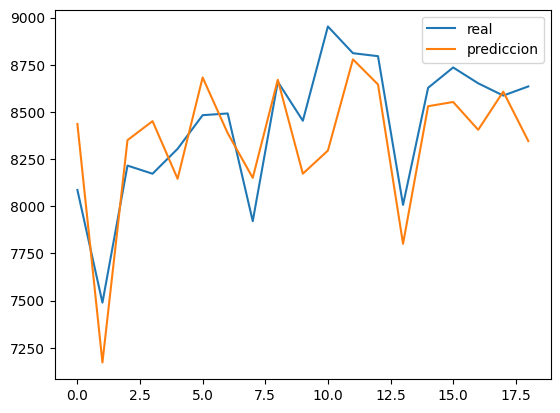

In [ ]:
plt.plot(y_test.values, label = 'real')
plt.plot(mod_lin.predict(X_test), label = 'prediccion')
plt.legend()


In [ ]:
mean_squared_error(y_train, mod_lin.predict(X_train)),mean_squared_error(y_test, mod_lin.predict(X_test))

(32700.2554331281, 63824.50005017984)

In [ ]:
def gen_mod( X ):
  colum_num = list(X.columns)
  colum_num.remove('tend')
  tendencia = ['tend']

  pipe = ColumnTransformer([("num", proceso_num, colum_num),('tend', func_tend, tendencia)])
  lin = Pipeline([('procesado', pipe), ('estimación', LinearRegression())])

  return lin


In [ ]:
import warnings

warnings.filterwarnings("ignore")

valores = []

for i  in range(2,20):
  X, y = datos_prov(50, fin = i)
  lin = gen_mod(X)

  porc_ent = 0.8
  ind = int(len(X)*porc_ent)

  X_train,X_test = X.iloc[:ind], X.iloc[ind:]
  y_train,y_test = y.iloc[:ind], y.iloc[ind:]


  lin.fit(X_train,y_train)
  res_train = mean_squared_error(y_train, lin.predict(X_train))
  res_test = mean_squared_error(y_test, lin.predict(X_test))
  valores.append(np.array([res_train,res_test]))

valores = np.array(valores)


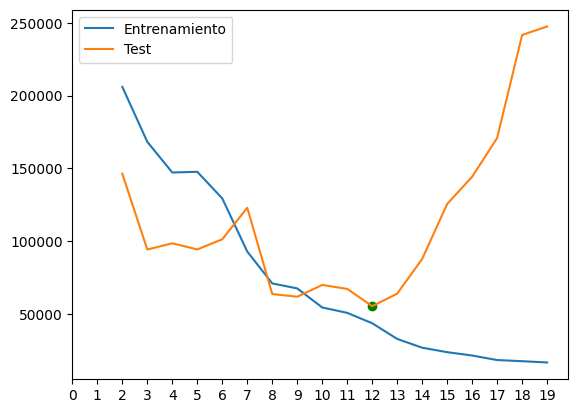

In [ ]:
val = list(range(2,20))
cant_min = np.array(range(2,20))[valores[:,1] == valores[:,1].min()]
val_min = valores[:,1].min()

plt.plot(val,valores[:,0], label = 'Entrenamiento')
plt.plot(val,valores[:,1], label = 'Test')
plt.scatter(cant_min, val_min, color = 'green')

plt.xticks(list(range(20)))
plt.legend()

In [ ]:
X, y = datos_prov(50, fin = 12)
mod_optimo = gen_mod(X)

porc_ent = 0.8
ind = int(len(X)*porc_ent)

X_train,X_test = X.iloc[:ind], X.iloc[ind:]
y_train,y_test = y.iloc[:ind], y.iloc[ind:]


mod_optimo.fit(X_train,y_train)

Pipeline(steps=[('procesado',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>,
                                                                                       inverse_func=<ufunc 'exp'>,
                                                                                       validate=True)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['lag1_prom', 'lag2_prom',
                                                   'lag3_prom', 'lag4_prom',
                                                   'lag5_prom', 'lag6_prom',
                                                   'lag7_prom', 'lag8_prom',
                                                   'lag9_prom', 'lag10_prom',
                                                   'lag11_prom', 'lag1_puestos',
                                                   'lag2_puestos',
                                                   'lag3_puestos',
                                                   'lag4_puestos',
                                                   'lag5_puestos',
                                                   'lag6_puestos',
                                                   'lag7_puestos',
                                                   'lag8_puestos',
                                                   'lag9_puestos',
                                                   'lag10_puestos',
                                                   'lag11_puestos']),
                                                 ('tend',
                                                  FunctionTransformer(func=<function <lambda> at 0x7d14881144c0>,
                                                                      inverse_func=<function <lambda> at 0x7d1488114a60>),
                                                  ['tend'])])),
                ('estimación', LinearRegression())])

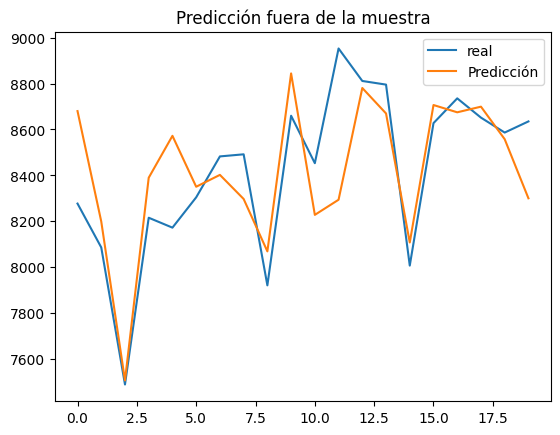

In [ ]:
plt.plot(y_test.values, label = 'real')
plt.plot(mod_optimo.predict(X_test), label = 'Predicción')
plt.title("Predicción fuera de la muestra")
plt.legend()

**¿Cuánto va ser el salario para Mendoza en el próximo mes?**

Con el modelo armado y entrenado estamos en condiciones de hacer una predicción para el próximo periodo que desconocemos ya que no lo tenemos en los datos.

In [ ]:
X_ult,y_ult = datos_prov(50, ini = 0, fin = 12)

def pred_prox_peri(X_ult,mod_optimo ,inf_ult = inf[-1] ):
  prox_peri = X_ult.index[-1]+ pd.Timedelta(days = 30)
  sac = 1.5 if prox_peri.month in (6,12) else 1
  pred = mod_optimo.predict(X_ult)[-1]
  res = {}
  res['valores_reales'] = pred
  res['Valores_nominales'] = pred*inf_ult
  res['VN_con_sac'] = pred*inf_ult*sac
  return res

pred_prox_peri(X_ult, mod_optimo)

{'valores_reales': 8693.959089624299,
 'Valores_nominales': 169526.665476862,
 'VN_con_sac': 254289.998215293}

# **<font color="DeepPink"> Cross-validation </font>**

Para hacer cross-valdiation en series temporales hay que tener en cuenta el orden de los datos. Cuando tenemos datos de corte transversal el supuesto que circula en el fondo es que los datos se distribuyen independientemente, pero en series temporales esto no es así, si no que los valores presentes dependen de los valores pasados.

Scikit learn cuenta con una fucnión específica para hacer cross-validation que es <code>TimeSeriesSplit()</code>.


TimeSeriesSplit es una variación de k-fold que devuelve las primeras "n-1" capas como conjunto de entrenamiento y la "n-ésimo" capa como conjunto de prueba. Es importante tener en cuenta que, a diferencia de los métodos de validación cruzada estándar, los conjuntos de entrenamiento sucesivos son subconjuntos de los que los preceden. Además, agrega todos los datos excedentes al primer segmento de entrenamiento, que se utiliza siempre para entrenar el modelo.

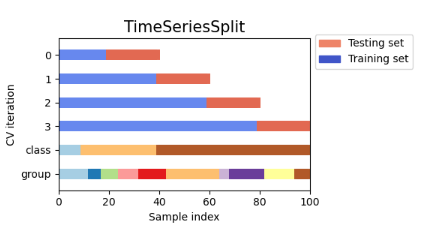

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate

tss = TimeSeriesSplit()
tss.split(X,y)

<generator object TimeSeriesSplit.split at 0x7d1486fc4890>

In [ ]:
for i,(train, test) in enumerate(tss.split(X,y)):
  print(train)
  print(test)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
[48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
[64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


El generador <code> TimeSeriesSplit()</code> lo único que hace es obtener los grupos de índices que vamos a utilizar para hacer la validación cruzada. Para realizarla, necesitamos utilizar la funcion <code> cross_validate()  </code> de Scikit Learn.

In [ ]:
X,y = datos_prov(50, ini = 1, fin = 12)

cv_results = cross_validate(mod_optimo, X,y,cv = tss, scoring= ['neg_mean_absolute_error','neg_root_mean_squared_error'])

In [ ]:
cv_results['test_neg_mean_absolute_error']

array([-1027.54320614, -1370.49649889,  -252.49156162,  -429.39622   ,
        -199.77401745])

In [ ]:
cv_results['test_neg_root_mean_squared_error']

array([-1156.7250231 , -1617.0529189 ,  -307.19605717,  -514.12787842,
        -266.70698653])

Vamos a crear una función que nos permita evaluar los modelos que vamos trabajando para ver cual podemos elegir

In [ ]:
def evaluar(modelo, X,y, cv):
  cv_results = cross_validate(modelo, X,y,cv = cv, scoring= ['r2','neg_mean_absolute_error','neg_root_mean_squared_error'])
  r2 = cv_results['test_r2']
  mae = -cv_results['test_neg_mean_absolute_error']
  rmse = -cv_results['test_neg_root_mean_squared_error']
  print(
        f"Error absoluto medio:            {mae.mean():.3f} +/- {mae.std():.3f}\n"
        f"raiz del error cuadrático medio: {rmse.mean():.3f} +/- {rmse.std():.3f}"
    )
evaluar(mod_optimo, X, y, tss)

Error absoluto medio:            655.940 +/- 462.787
raiz del error cuadrático medio: 772.362 +/- 529.148


Vamos a utilizar ahora esta función para evaluar cuantos lags conviene seleccionar en este caso. Para ello vamos a modificar la función y que nos devuelva un resultado

In [ ]:
def evaluar(modelo, X,y, cv):
  cv_results = cross_validate(modelo, X,y,cv = cv, scoring= ['r2','neg_mean_absolute_error','neg_root_mean_squared_error'])
  r2 = cv_results['test_r2']
  mae = -cv_results['test_neg_mean_absolute_error']
  rmse = -cv_results['test_neg_root_mean_squared_error']
  result = {}
  result['mae'] = mae.mean()
  result['rmse'] = rmse.mean()
  return result


In [ ]:
resultados = {}

for i  in range(2,20):
  X, y = datos_prov(50, fin = i)
  lin = gen_mod(X, i)

  res = evaluar(lin, X,y, tss)

  resultados[i] = res

resultados = pd.DataFrame(resultados).T

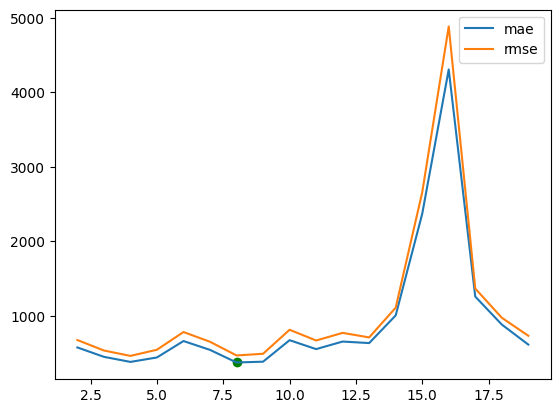

In [ ]:
resultados.plot()
plt.scatter(resultados.sort_values('mae').index[0],resultados.sort_values('mae')['mae'].iloc[0], color = 'green')

Utilizando validación cruzada nos dice que la cantidad óptima de rezagos son 8 que es el punto donde minimiza el mae. Pero estamos utilizando dos métricas. En estos casos podemos optar por una de las dos y elegir como modelo óptimo el que minimize esa o podemos calcular un promedio.

In [ ]:
resultados.mean(axis = 1).sort_values()

8      422.342591
4      423.070762
9      438.877846
3      493.269920
5      494.392027
7      598.455305
11     612.257493
2      626.536765
13     673.288909
19     674.378683
12     714.151037
6      723.193754
10     744.119127
18     929.770930
14    1058.195676
17    1313.210962
15    2512.185204
16    4593.867106
dtype: float64

Optando por el promedio también define que 8 lags son los óptimos para el modelo.

In [ ]:
X, y = datos_prov(50,fin = 8)
mod_optimo = gen_mod(X)
mod_optimo.fit(X,y)

X_ult,y_ult = datos_prov(50, ini = 0, fin = 8)

pred_prox_peri(X_ult, mod_optimo)

{'valores_reales': 8693.959089624299,
 'Valores_nominales': 169526.665476862,
 'VN_con_sac': 254289.998215293}

# **<font color="DeepPink"> Variables categóricas  </font>**

Las variables categóricas en series temporales tienen sentido a nivel periodo. Podemos buscar comportamientos particulares de acuerdo al mes, el día, la semana, o puede ser que tengamos años atípicos. Por ejemplo, en nuestra predicción de sueldos estamos obviando una información que tenemos, que el 2020 fue un año de pandemia y afecto a toda la economía. Por lo tanto incluir este tipo de información puede ser útil y de ayuda a la predicción.

Vamos a generar una categoría por mes y generar una dummy para el año 2020.

In [ ]:
salarios.index.get_level_values(1).month

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
           dtype='int64', name='fecha', length=2568)

In [ ]:
def gen_datos(prov, *args,**kwargs):
  X, y = datos_prov(prov, *args, **kwargs)
  X['mes'] = X.index.month
  X['pand'] = X.index.year == 2020
  return X, y

In [ ]:
X, y = gen_datos(50,fin = 8)
X

,lag1_prom,lag2_prom,lag3_prom,lag4_prom,lag5_prom,lag6_prom,lag7_prom,tend,lag1_puestos,lag2_puestos,lag3_puestos,lag4_puestos,lag5_puestos,lag6_puestos,lag7_puestos,mes,pand
fecha,,,,,,,,,,,,,,,,,
2014-08-01,9382.100715,8320.243458,8915.102621,8619.997175,8192.845116,8167.130894,8690.750087,7,412825.0,408525.0,411720.0,430541.0,423322.0,417718.0,407694.0,8,False
2014-09-01,9025.854342,9382.100715,8320.243458,8915.102621,8619.997175,8192.845116,8167.130894,8,412224.0,412825.0,408525.0,411720.0,430541.0,423322.0,417718.0,9,False
2014-10-01,8954.632669,9025.854342,9382.100715,8320.243458,8915.102621,8619.997175,8192.845116,9,414267.0,412224.0,412825.0,408525.0,411720.0,430541.0,423322.0,10,False
2014-11-01,8935.573041,8954.632669,9025.854342,9382.100715,8320.243458,8915.102621,8619.997175,10,418282.0,414267.0,412224.0,412825.0,408525.0,411720.0,430541.0,11,False
2014-12-01,8905.060083,8935.573041,8954.632669,9025.854342,9382.100715,8320.243458,8915.102621,11,420951.0,418282.0,414267.0,412224.0,412825.0,408525.0,411720.0,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,7921.178773,102,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,421148.0,7,False
2022-08-01,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,8659.839222,103,423768.0,423347.0,419360.0,427486.0,433225.0,427204.0,420055.0,8,False
2022-09-01,8735.563104,8627.705083,8007.231768,8795.418980,8811.269661,8952.792965,8453.192937,104,422842.0,423768.0,423347.0,419360.0,427486.0,433225.0,427204.0,9,False


Ahora va ser necesario modificar nuesto pipeline ya que tenemos dos variables categóricas que tomar.

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
def gen_mod( X ):
  column_cat = ['mes','pand']
  colum_num = list(X.columns)
  colum_num.remove('tend')
  colum_num.remove('mes')
  colum_num.remove('pand')
  tendencia = ['tend']

  pipe = ColumnTransformer(
      [("num", proceso_num, colum_num),
      ('tend', func_tend, tendencia),
      ('cate', OneHotEncoder(handle_unknown='ignore'), column_cat)
      ])

  lin = Pipeline([('procesado', pipe), ('estimación', LinearRegression())])

  return lin


In [ ]:
mod_lin = gen_mod(X)
evaluar(mod_lin,X,y, tss)

{'mae': 500.8663346155321, 'rmse': 587.2573474954291}

Al agregarle estas variables categoricas vemos que los valores de las métricas son peores a los obtenidos anteriormente. Pero puede ser porque ahora cambie la cantidad de lags que necesitemos. Vamos a volver a realizar la evaluación por lags.

In [ ]:
resultados = {}

for i  in range(2,20):
  X, y = gen_datos(50, fin = i)
  lin = gen_mod(X)

  res = evaluar(lin, X,y, tss)

  resultados[i] = res

resultados = pd.DataFrame(resultados).T

In [ ]:
resultados.mean(axis = 1).sort_values()

3      335.452975
13     367.468601
6      386.898739
4      428.943390
2      433.402272
5      500.616770
7      534.155318
8      544.061841
9      647.117808
10     649.697767
19     689.696105
14     709.133964
12     831.901940
18     847.999606
15     853.072872
16     974.157459
17    1233.388882
11    4117.721222
dtype: float64

Bajo estos resultados nos dice que el modelo óptimo solo debe incluir 3 lags.

In [ ]:
X,y = gen_datos(50,fin = 3)
mod_optimo = gen_mod(X)
mod_optimo.fit(X,y)

X_ult,y_ult = gen_datos(50, ini = 0, fin = 3)
pred_prox_peri(X_ult, mod_optimo)

{'valores_reales': 8527.033567332135,
 'Valores_nominales': 166271.7240991246,
 'VN_con_sac': 249407.5861486869}